1. Demographic:
a. Which 2 demographics have proven to be the most popular with the telco brand?
b. If the marketing team wanted to increase customer retention, to whom should 
they target their advertisements to?


2. Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to 
customers churning? (Use visualizations in explaining your analysis)
b. If the telco was to offer Phone as a standalone service, which type of contract 
would encourage customer retention?


3. Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what 
monthly prices will be appropriate for the following packages to keep customers 
from churning:
i. Basic
ii. Plus
iii. Premium
b. Should the company strictly go paperless for their monthly billings as a technique 
of keeping their customers and why?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['Count'] = 1
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Demographics

In [6]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [7]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [8]:
df['SeniorCitizen'].replace(1,'Yes', inplace=True)
df['SeniorCitizen'].replace(0,'No', inplace=True)
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [9]:
df1 = df[['gender', 'SeniorCitizen', 'Count']]
df1.groupby(['gender', 'SeniorCitizen']).count().reset_index()

,gender,SeniorCitizen,Count
0,Female,No,2920
1,Female,Yes,568
2,Male,No,2981
3,Male,Yes,574


Text(0, 0.5, 'No of subscribers')

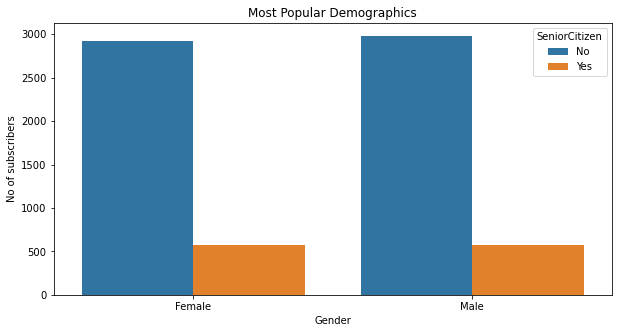

In [10]:
%matplotlib inline
#Most popular demographics
df_demo=df.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y= "Count", hue="SeniorCitizen", data=df_demo)
plt.title("Most Popular Demographics")
plt.xlabel("Gender")
plt.ylabel("No of subscribers")

most of those using the telco brand are not senior citizens from both genders. Thus, the marketing team needs to target their advertisements to senior citizens for more customer retention.

## 2. Services

In [11]:
churn_df = df[['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract', 'Churn']][df['Churn'] == "Yes"]

churn_df.head()   

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


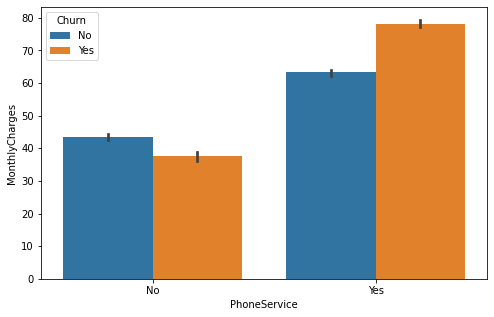

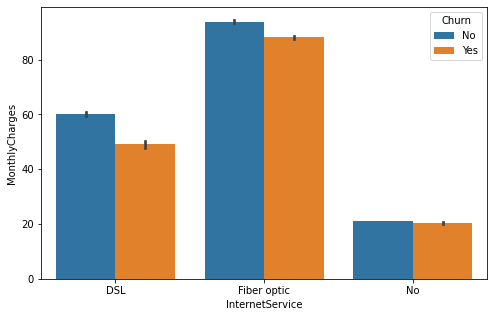

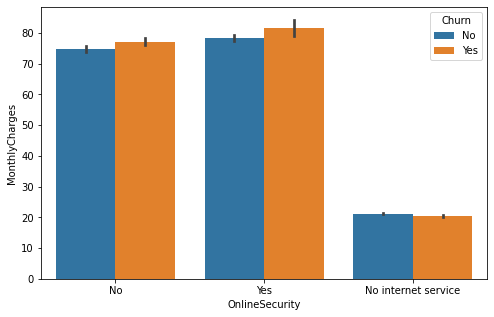

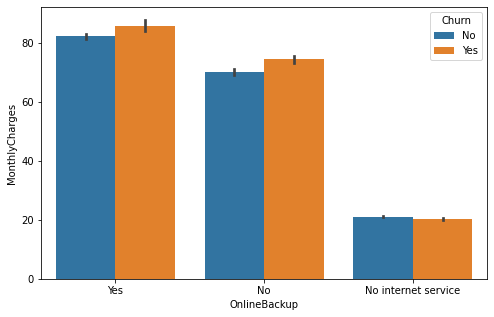

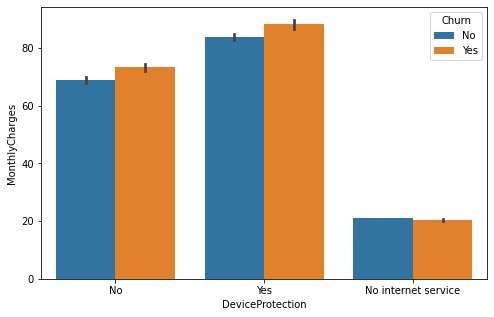

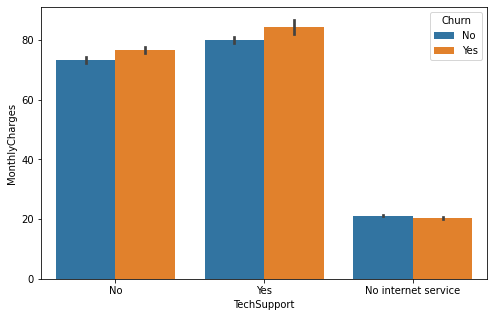

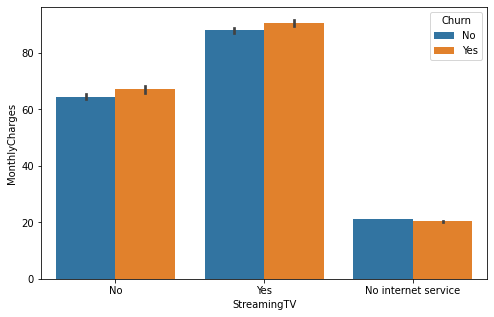

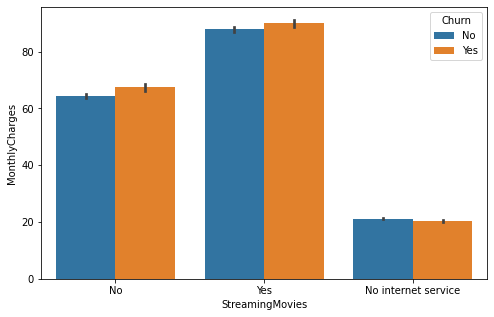

In [12]:
for col in ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
        plt.figure(figsize=(8,5))
        sns.barplot(x=col, y='MonthlyCharges', hue='Churn', data=df, palette="tab10")
        plt.show()

###  If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [13]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0, 0.5, 'No of subscribers')

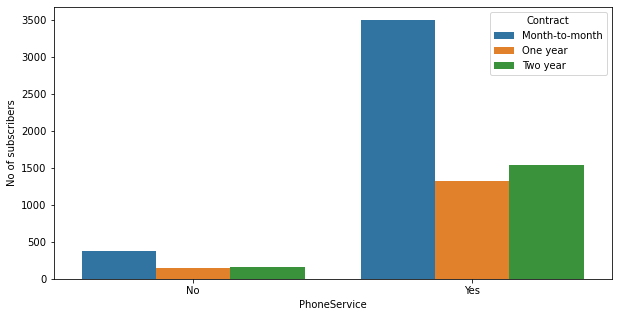

In [14]:
df_phone=df.groupby(["PhoneService", "Contract"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.countplot(x="PhoneService", hue="Contract", data=df)
plt.xlabel("PhoneService")
plt.ylabel("No of subscribers")

The Month to Month contract is clearly the most preferred for the phone service

### 3. Payment

In [15]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0, 'MonthlyCharges')

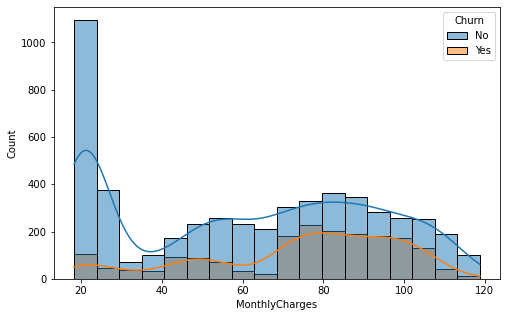

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(x="MonthlyCharges", hue ="Churn", data=df, kde=True,)
plt.xlabel("MonthlyCharges")

In [17]:
#Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Text(0, 0.5, 'No of subscribers')

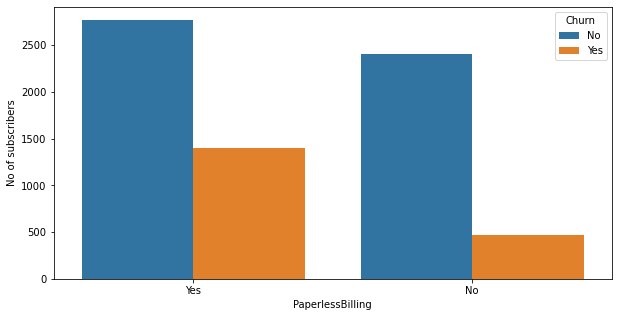

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.xlabel("PaperlessBilling")
plt.ylabel("No of subscribers")